# API Integration using GitHub API to find Bioinformatics Projects on GitHub

## Installing Requests


The requests package allows a Python program to easily request information from a website and examine the response that’s returned. To install requests, issue a command like the following:

In [ ]:
#pip install --user requests  --- in the terminal

## Processing an API Response

Now we’ll begin to write a program to issue an API call and process the results by identifying the most starred Bioinformatics projects on GitHub

In [1]:
import requests

# API Endpoint and Query Parameters
BASE_URL = "https://api.github.com/search/repositories"
QUERY = "bioinformatics"  # Search term for bioinformatics projects
PARAMS = {
    "q": QUERY,           # Only "bioinformatics" keyword
    "sort": "stars",      # Sort by the most stars
    "order": "desc",      # Descending order
    "per_page": 10        # Number of results per page
}

def search_repositories():
    try:
        # Make the GET request
        response = requests.get(BASE_URL, params=PARAMS)
        response.raise_for_status()  # Raise an error for bad status codes
        
        # Parse the JSON response
        results = response.json()
        repositories = results.get("items", [])
        
        # Display results
        for repo in repositories:
            print(f"Name: {repo['name']}")
            print(f"Stars: {repo['stargazers_count']}")
            print(f"Description: {repo['description'] or 'No description available'}")
            print(f"URL: {repo['html_url']}")
            print("-" * 50)
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

# Run the function
search_repositories()


Name: cs-video-courses
Stars: 67951
Description: List of Computer Science courses with video lectures.
URL: https://github.com/Developer-Y/cs-video-courses
--------------------------------------------------
Name: dash
Stars: 21853
Description: Data Apps & Dashboards for Python. No JavaScript Required.
URL: https://github.com/plotly/dash
--------------------------------------------------
Name: bioinformatics
Stars: 5737
Description: :microscope: Path to a free self-taught education in Bioinformatics!
URL: https://github.com/ossu/bioinformatics
--------------------------------------------------
Name: biopython
Stars: 4467
Description: Official git repository for Biopython (originally converted from CVS)
URL: https://github.com/biopython/biopython
--------------------------------------------------
Name: deepvariant
Stars: 3305
Description: DeepVariant is an analysis pipeline that uses a deep neural network to call genetic variants from next-generation DNA sequencing data.
URL: https://git

## Working with the Response Dictionary

Now that we have the information from the API call stored as a dictionary, we can work with the data stored there

In [2]:
import requests

# Make an API call to search for Bioinformatics repositories and store the response.
url = 'https://api.github.com/search/repositories?q=bioinformatics&sort=stars'
response = requests.get(url)

# Check and print the status code to ensure the API call was successful.
print("Status code:", response.status_code)

# Store the API response in a variable.
if response.status_code == 200:  # Ensure the API call succeeded
    response_dict = response.json()
    
    # Print the total number of repositories.
    print("Total repositories:", response_dict['total_count'])
    
    # Explore information about the repositories.
    repo_dicts = response_dict['items']
    print("Repositories returned:", len(repo_dicts))
    
    # Examine the first repository.
    if repo_dicts:
        repo_dict = repo_dicts[0]
        print("\nNumber of keys in the first repository:", len(repo_dict))
        
        # Print all keys in the first repository, sorted alphabetically.
        print("\nKeys in the first repository:")
        for key in sorted(repo_dict.keys()):
            print(key)
        
        # Additional exploration: print specific details of the first repository
        print("\nDetails of the first repository:")
        print(f"Name: {repo_dict['name']}")
        print(f"Owner: {repo_dict['owner']['login']}")
        print(f"Stars: {repo_dict['stargazers_count']}")
        print(f"Description: {repo_dict['description']}")
        print(f"URL: {repo_dict['html_url']}")
    else:
        print("No repositories found in the response.")
else:
    print("Failed to retrieve data from GitHub API.")


Status code: 200
Total repositories: 34833
Repositories returned: 30

Number of keys in the first repository: 80

Keys in the first repository:
allow_forking
archive_url
archived
assignees_url
blobs_url
branches_url
clone_url
collaborators_url
comments_url
commits_url
compare_url
contents_url
contributors_url
created_at
default_branch
deployments_url
description
disabled
downloads_url
events_url
fork
forks
forks_count
forks_url
full_name
git_commits_url
git_refs_url
git_tags_url
git_url
has_discussions
has_downloads
has_issues
has_pages
has_projects
has_wiki
homepage
hooks_url
html_url
id
is_template
issue_comment_url
issue_events_url
issues_url
keys_url
labels_url
language
languages_url
license
merges_url
milestones_url
mirror_url
name
node_id
notifications_url
open_issues
open_issues_count
owner
private
pulls_url
pushed_at
releases_url
score
size
ssh_url
stargazers_count
stargazers_url
statuses_url
subscribers_url
subscription_url
svn_url
tags_url
teams_url
topics
trees_url
updated_a

Let's pull out some of the keys in repo_dict

In [3]:
# Examine and print selected information about the first repository.
print("\nSelected information about the first repository:")
try:
    print('Name:', repo_dict['name'])
    print('Owner:', repo_dict['owner']['login'])
    print('Stars:', repo_dict['stargazers_count'])
    print('Repository:', repo_dict['html_url'])
    print('Created:', repo_dict['created_at'])
    print('Updated:', repo_dict['updated_at'])
    print('Description:', repo_dict['description'])
except KeyError as e:
    print(f"Key error: {e}. Some information may be missing.")


Selected information about the first repository:
Name: cs-video-courses
Owner: Developer-Y
Stars: 67951
Repository: https://github.com/Developer-Y/cs-video-courses
Created: 2016-10-21T17:02:11Z
Updated: 2025-01-27T10:42:35Z
Description: List of Computer Science courses with video lectures.


## Summarizing the Top Repositories

Let’s write a loop to print selected information about each of the repositories returned by the API call so we can include them all in the visualization:

In [4]:
# Summarize selected information about each repository.
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    try:
        print('\nName:', repo_dict.get('name', 'N/A'))
        print('Owner:', repo_dict.get('owner', {}).get('login', 'N/A'))
        print('Stars:', repo_dict.get('stargazers_count', 'N/A'))
        print('Repository:', repo_dict.get('html_url', 'N/A'))
        print('Description:', repo_dict.get('description', 'N/A'))
    except Exception as e:
        print(f"An error occurred while processing repository: {e}")


Selected information about each repository:

Name: cs-video-courses
Owner: Developer-Y
Stars: 67951
Repository: https://github.com/Developer-Y/cs-video-courses
Description: List of Computer Science courses with video lectures.

Name: dash
Owner: plotly
Stars: 21853
Repository: https://github.com/plotly/dash
Description: Data Apps & Dashboards for Python. No JavaScript Required.

Name: bioinformatics
Owner: ossu
Stars: 5737
Repository: https://github.com/ossu/bioinformatics
Description: :microscope: Path to a free self-taught education in Bioinformatics!

Name: biopython
Owner: biopython
Stars: 4467
Repository: https://github.com/biopython/biopython
Description: Official git repository for Biopython (originally converted from CVS)

Name: deepvariant
Owner: google
Stars: 3305
Repository: https://github.com/google/deepvariant
Description: DeepVariant is an analysis pipeline that uses a deep neural network to call genetic variants from next-generation DNA sequencing data.

Name: awesome-s

## Visualizing Repositories Using Matplotlib

Now that we have some interesting data, let’s make a visualization showing the relative popularity of Bioinformatics projects on GitHub. We’ll make a bar chart: the height of each bar will represent the number of stars the project has acquired.

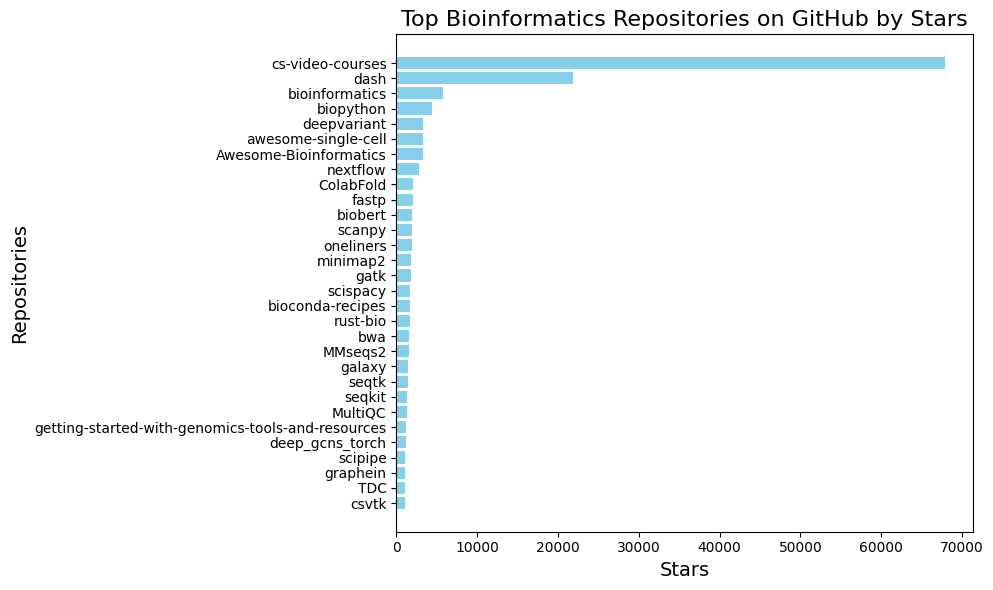

In [1]:
import requests
import matplotlib.pyplot as plt

# Make an API call to search for Bioinformatics repositories and store the response.
url = 'https://api.github.com/search/repositories?q=bioinformatics&sort=stars'
response = requests.get(url)

# Check the response status code.
if response.status_code == 200:
    response_dict = response.json()
    repo_dicts = response_dict['items']  # Get the list of repositories
    
    # Prepare data for visualization
    repo_names = [repo['name'] for repo in repo_dicts]  # Repository names
    stars = [repo['stargazers_count'] for repo in repo_dicts]  # Star counts
    
    # Create a bar chart
    plt.figure(figsize=(10, 6))  # Set the figure size
    plt.barh(repo_names, stars, color='skyblue')  # Horizontal bar chart for better readability
    plt.xlabel('Stars', fontsize=14)
    plt.ylabel('Repositories', fontsize=14)
    plt.title('Top Bioinformatics Repositories on GitHub by Stars', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis so the highest stars appear on top
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    # Show the plot
    plt.show()
else:
    print("Failed to retrieve data from GitHub API.")


## Refining the Chart

Let’s refine the styling of our chart. We’ll be making a few different customizations, so first restructure the code slightly by creating a configuration object that contains all of our customizations to pass to Bar()

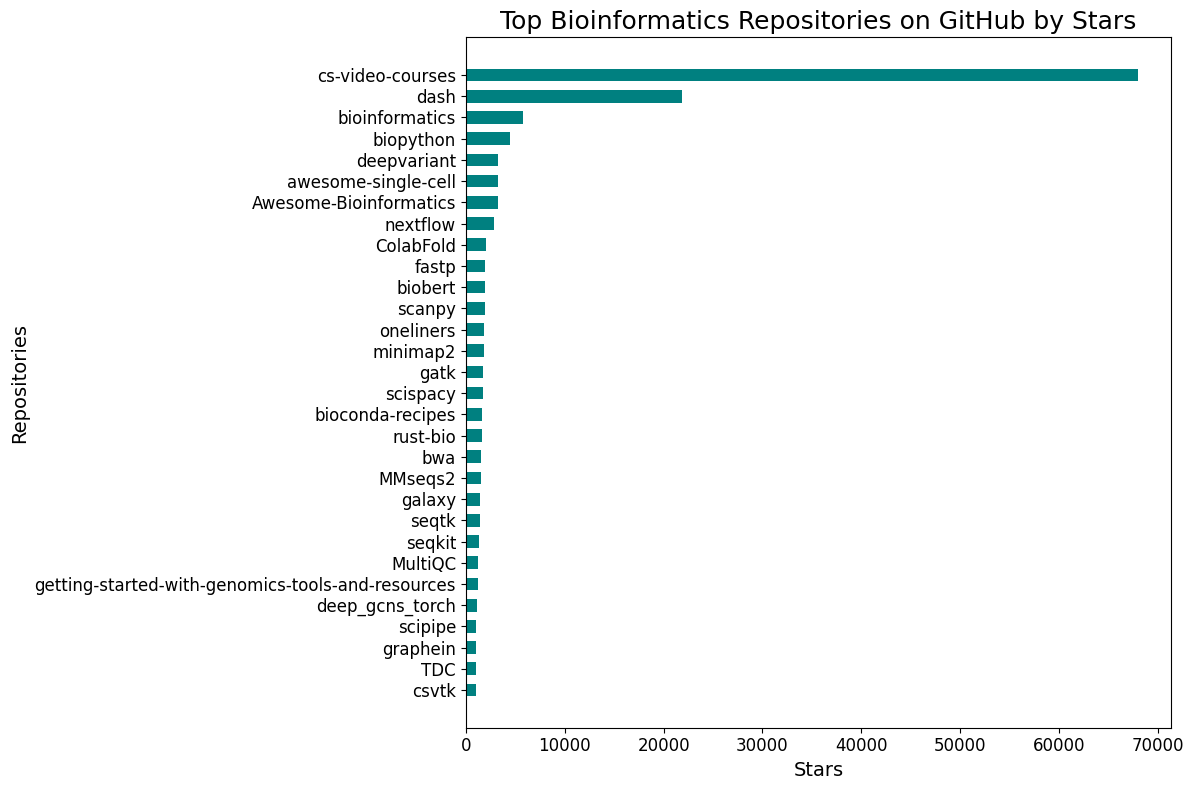

In [2]:
import requests
import matplotlib.pyplot as plt

# Make an API call to search for Bioinformatics repositories and store the response.
url = 'https://api.github.com/search/repositories?q=bioinformatics&sort=stars'
response = requests.get(url)

if response.status_code == 200:
    response_dict = response.json()
    repo_dicts = response_dict['items']  # Get the list of repositories
    
    # Prepare data for visualization
    repo_names = [repo['name'] for repo in repo_dicts]  # Repository names
    stars = [repo['stargazers_count'] for repo in repo_dicts]  # Star counts
    
    # Configuration object for bar chart customization
    chart_config = {
        "bar_color": "teal",           # Color of the bars
        "bar_height": 0.6,            # Height of each bar
        "figure_size": (12, 8),       # Size of the figure
        "title": "Top Bioinformatics Repositories on GitHub by Stars",
        "x_label": "Stars",
        "y_label": "Repositories",
        "title_fontsize": 18,
        "label_fontsize": 14,
        "tick_fontsize": 12,
    }
    
    # Create a bar chart
    plt.figure(figsize=chart_config["figure_size"])  # Set the figure size
    plt.barh(
        repo_names,
        stars,
        color=chart_config["bar_color"],
        height=chart_config["bar_height"],
    )  # Horizontal bar chart
    
    # Add labels and title
    plt.xlabel(chart_config["x_label"], fontsize=chart_config["label_fontsize"])
    plt.ylabel(chart_config["y_label"], fontsize=chart_config["label_fontsize"])
    plt.title(chart_config["title"], fontsize=chart_config["title_fontsize"])
    
    # Adjust tick label font sizes and invert the y-axis
    plt.xticks(fontsize=chart_config["tick_fontsize"])
    plt.yticks(fontsize=chart_config["tick_fontsize"])
    plt.gca().invert_yaxis()  # Invert y-axis so the highest stars appear on top
    
    # Tighten layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
else:
    print("Failed to retrieve data from GitHub API.")


## Plotting the Data

To plot our data, we’ll generate plot_dicts automatically for the 30 projects returned by the API call.

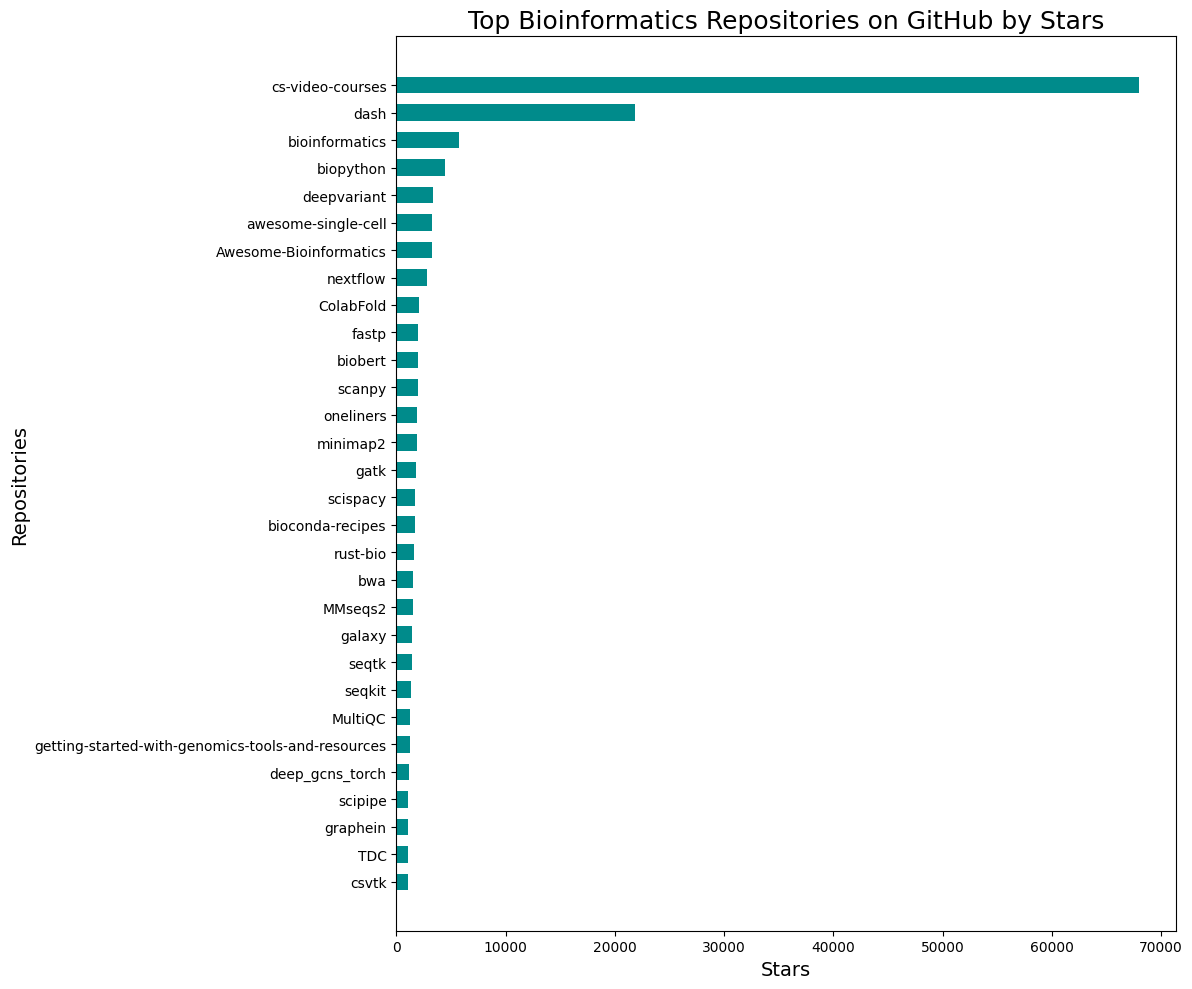

In [3]:
import requests
import matplotlib.pyplot as plt

# Make an API call to search for Bioinformatics repositories and store the response.
url = 'https://api.github.com/search/repositories?q=bioinformatics&sort=stars&per_page=30'
response = requests.get(url)

if response.status_code == 200:
    response_dict = response.json()
    repo_dicts = response_dict['items']  # Get the list of repositories
    
    # Generate plot_dicts automatically
    plot_dicts = [
        {
            "name": repo['name'],
            "stars": repo['stargazers_count'],
            "label": repo['description'] if repo['description'] else "No description provided",
        }
        for repo in repo_dicts
    ]
    
    # Configuration object for bar chart customization
    chart_config = {
        "bar_color": "darkcyan",      # Color of the bars
        "bar_height": 0.6,           # Height of each bar
        "figure_size": (12, 10),     # Size of the figure
        "title": "Top Bioinformatics Repositories on GitHub by Stars",
        "x_label": "Stars",
        "y_label": "Repositories",
        "title_fontsize": 18,
        "label_fontsize": 14,
        "tick_fontsize": 10,
    }
    
    # Extract repository names and star counts from plot_dicts
    repo_names = [repo['name'] for repo in plot_dicts]
    stars = [repo['stars'] for repo in plot_dicts]
    
    # Create a bar chart
    plt.figure(figsize=chart_config["figure_size"])  # Set the figure size
    plt.barh(
        repo_names,
        stars,
        color=chart_config["bar_color"],
        height=chart_config["bar_height"],
    )  # Horizontal bar chart
    
    # Add labels and title
    plt.xlabel(chart_config["x_label"], fontsize=chart_config["label_fontsize"])
    plt.ylabel(chart_config["y_label"], fontsize=chart_config["label_fontsize"])
    plt.title(chart_config["title"], fontsize=chart_config["title_fontsize"])
    
    # Adjust tick label font sizes and invert the y-axis
    plt.xticks(fontsize=chart_config["tick_fontsize"])
    plt.yticks(fontsize=chart_config["tick_fontsize"])
    plt.gca().invert_yaxis()  # Invert y-axis so the highest stars appear on top
    
    # Tighten layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()
else:
    print("Failed to retrieve data from GitHub API.")
